### Demonstration of Bayesian Perception Concepts

# Case 1: Stabilizing benefit of contextual prior

## Example 1: Long-range velocity measurements have high variance, but a contextual prior ensures a reasonable and more stable intial estimate for long-time planning.

Assumptions:
- Detected object with hypothesis 'car' is situated on a 80 km/h road (prior)
- Measurement taken with a millimeter wave radar and provide a direct velocity estimate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gaussian

np.random.seed(seed=0)

### Measurements

The true velocity of the observed object is a hidden parameter we cannot observe directly.

We assume the measurement device outputs an approximate estimates which is **noisy but not biased**, and therefore can be **modeled by a Gaussian distribution**, where samples denote actual measurement values.

The measurement variance is known and is assumed to be a **learned function** which depends on the model/device and **environmental parameters**:
- Approximate distance rage (i.e. order of 10 or 100 meters?)
- Illumination (i.e. daylight or dusk)
- Approximate size of object (i.e. large truck or pedestrian?)
- etc.

In [2]:
# Unobservable true velocity
true_vel = 92  # [km/h]

# Measurement values are sampled from Gaussian distribution (mu=true velocity, sigma^2=10)
meas_num = 4
meas_sigma = 10.0
meas_mu = np.random.normal(true_vel, meas_sigma, meas_num)
for i in range(meas_num):
    print(f"Measurement {i}: {meas_mu[i]:.1f} km\h")

# Label strings for plots
labels = ["prior", "meas", "posterior"]

Measurement 0: 109.6 km\h
Measurement 1: 96.0 km\h
Measurement 2: 101.8 km\h
Measurement 3: 114.4 km\h


### Prior

The prior is context-dependent, meaning the velocity prior is set according to the **statistical average of the road type** (i.e. vehicle speed modeled as a Gaussian distribution with optimal mean and variance which maximizes the likelihood of observed data).

In this example, the detected object is situated on a 80 km/h road (inferred from road signs or a map). Statistically we have observed that vehicles tend to overspeed and the optimal distribution have a particular variance.

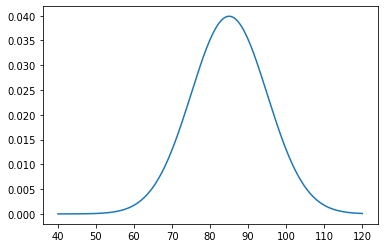

In [3]:
# Prior distribution (Univariate gaussian)
prior_mu = 85.0  # Learned prior - statistically drivers tend to overspeed
prior_sigma = 10  # Optimized over data
gaussian.plot([prior_mu], [prior_sigma], 40, 120)

### Bayesian inference

The true velocity is estimated by integrating the prior and noisy measurements using Baye's theorem. This operation leverages the estimated uncertainty to integrate information from both the senses and prior knowledge in a principled manner using the laws of probability.

Biological minds are theorized to do approximate Bayesian inference as well.

Measurement 0: 109.6, var 10.0 km/h
      Error: (meas) 17.6 -> (posterior) 5.3 km/h


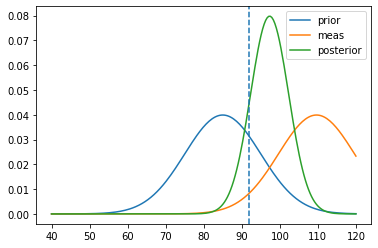

Measurement 1: 96.0, var 10.0 km/h
      Error: (meas) 4.0 -> (posterior) -1.5 km/h


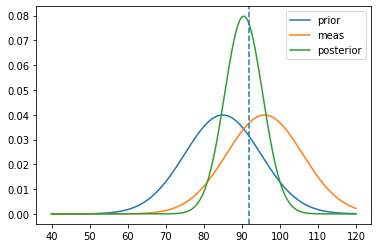

Measurement 2: 101.8, var 10.0 km/h
      Error: (meas) 9.8 -> (posterior) 1.4 km/h


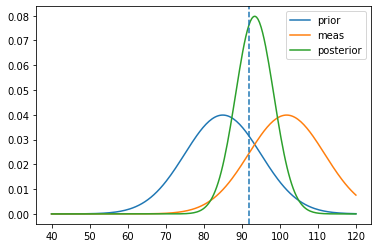

Measurement 3: 114.4, var 10.0 km/h
      Error: (meas) 22.4 -> (posterior) 7.7 km/h


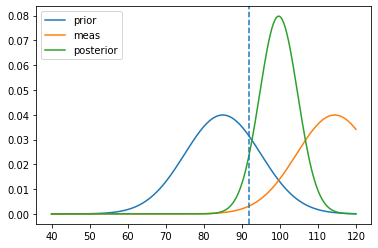

In [4]:
for i in range(meas_num):
    posterior_mu, posterior_sigma = gaussian.bayes_inf(meas_mu[i], meas_sigma, prior_mu, prior_sigma)
    print(f"Measurement {i}: {meas_mu[i]:.1f}, var {meas_sigma} km/h\n      Error: (meas) {meas_mu[i]-true_vel:.1f} -> (posterior) {posterior_mu-true_vel:.1f} km/h")
    mu_lst = [prior_mu, meas_mu[i], posterior_mu]
    sigma_lst = [prior_sigma, meas_sigma, posterior_sigma]
    gaussian.plot(mu_lst, sigma_lst, 40, 120, true_vel, labels)

### Conclusion

Adding a context-dependent velocity prior is expected to reduce the magnitude of the largest measurement errors and thus stabilize the measurement.

## Example 2: Integrating several noisy estimates produce a less noisy estimate

Assumptions:
- Detected object with hypothesis 'car' is situated on a 80 km/h road (prior)
- Measurement taken with a millimeter wave radar and provide a direct velocity estimate.

In [5]:
# Unobservable true velocity
true_vel = 92  # [km/h]

# Measurement values are sampled from Gaussian distribution (mu=true velocity, sigma^2=10)
meas_num = 64
meas_sigma = 10.0
meas_mu = np.random.normal(true_vel, meas_sigma, meas_num)
for i in range(meas_num):
    if i % 10 == 0:
        print(f"Measurement {i}: {meas_mu[i]:.1f} km\h")

# Label strings for plots
labels = ["prior", "MLE meas", "posterior"]

Measurement 0: 110.7 km\h
Measurement 10: 96.4 km\h
Measurement 20: 114.7 km\h
Measurement 30: 88.5 km\h
Measurement 40: 86.9 km\h
Measurement 50: 91.7 km\h
Measurement 60: 93.8 km\h


MLE measurements 1: 110.7, var 10.0 km/h
      Error: (meas) 18.7 -> (posterior) 5.8 km/h


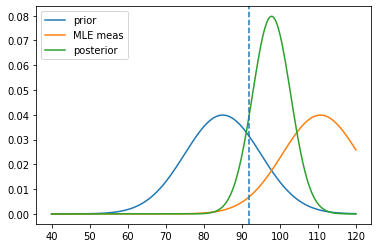

MLE measurements 2: 96.5, var 10.0 km/h
      Error: (meas) 4.5 -> (posterior) 0.6 km/h


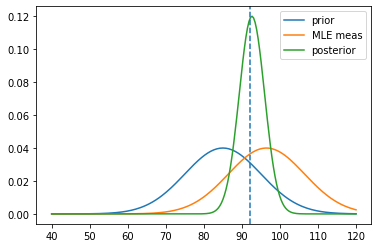

MLE measurements 4: 96.2, var 10.0 km/h
      Error: (meas) 4.2 -> (posterior) 2.0 km/h


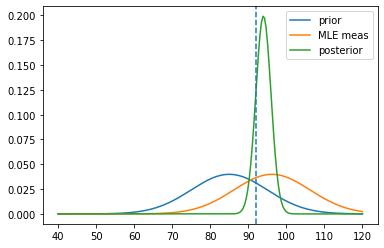

MLE measurements 8: 96.5, var 10.0 km/h
      Error: (meas) 4.5 -> (posterior) 3.2 km/h


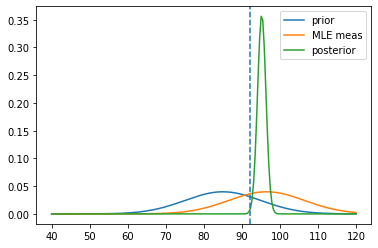

MLE measurements 16: 95.8, var 10.0 km/h
      Error: (meas) 3.8 -> (posterior) 3.1 km/h


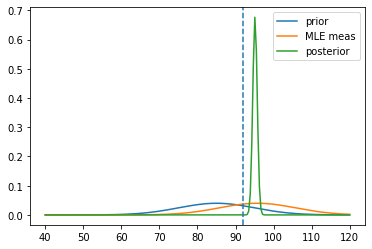

MLE measurements 32: 93.7, var 10.0 km/h
      Error: (meas) 1.7 -> (posterior) 1.4 km/h


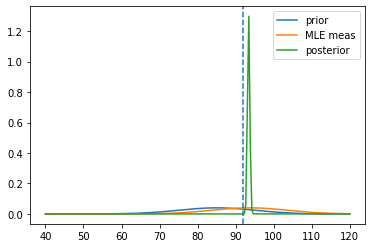

MLE measurements 64: 91.1, var 10.0 km/h
      Error: (meas) -0.9 -> (posterior) -1.0 km/h


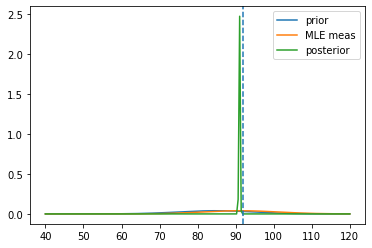

In [6]:
int_num_lst = [1, 2, 4, 8, 16, 32, 64]

for N in int_num_lst:
    
    mle_mu = np.mean(meas_mu[0:N])
    posterior_mu, posterior_sigma = gaussian.bayes_inf(mle_mu, meas_sigma, prior_mu, prior_sigma, N)
    print(f"MLE measurements {N}: {mle_mu:.1f}, var {meas_sigma} km/h\n      Error: (meas) {mle_mu-true_vel:.1f} -> (posterior) {posterior_mu-true_vel:.1f} km/h")
    mu_lst = [prior_mu, mle_mu, posterior_mu]
    sigma_lst = [prior_sigma, meas_sigma, posterior_sigma]
    gaussian.plot(mu_lst, sigma_lst, 40, 120, true_vel, labels)

### Conclusion

Integrating measurements with a prior is expected to reduce the magnitude of the largest measurement errors and thus stabilize the measurement.

Integrating several measurement makes the combined estimate more robust and approach the true value as long as the measurement models are unbiased, Additionally, the effect of the prior decreases with number of measurements, reducing the inherent bias caused by the prior.